In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# Data Preprocessing

In [3]:
inputspath_16 = "C:\\Users\\BillWan\\Desktop\\Inner_Wave\\pre-exp\\inputs_win16.csv"
labelspath_16 = "C:\\Users\\BillWan\\Desktop\\Inner_Wave\\pre-exp\\labels_win16.csv"
X_16 = pd.read_csv(inputspath_16)
y_16 = pd.read_csv(labelspath_16)

In [4]:
print(X_16.shape)
print(y_16.shape)

(53440, 16)
(6680, 2)


In [5]:
index = np.arange(53440)
sub_idx1 = index[2::8]
sub_idx2 = index[3::8]
sub_idx3 = index[4::8]
sub_idx4 = index[5::8]
sub_idx5 = index[6::8]
sub_idx6 = index[7::8]

X_16 = X_16.values
X_6v = np.empty([0, 96])

for i in range(sub_idx1.shape[0]):
    X_app = np.concatenate((X_16[sub_idx1[i]], X_16[sub_idx2[i]], X_16[sub_idx3[i]], X_16[sub_idx4[i]], X_16[sub_idx5[i]], X_16[sub_idx6[i]]))
    X_app = np.reshape(X_app,(1,96))
    X_6v = np.append(X_6v, X_app, axis=0)
print(X_6v.shape)

(6680, 96)


In [6]:
print(np.any(np.isnan(X_6v)))

where_are_NaNs = np.isnan(X_6v)
X_6v[where_are_NaNs] = 0

print(np.any(np.isnan(X_6v)))

True
False


In [7]:
y = y_16.iloc[:,1].values
y.shape

(6680,)

# visualisation

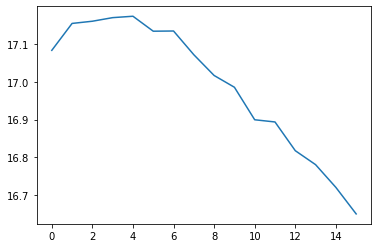

In [158]:
plt.plot(X_16[8*6+2])

In [190]:
y[6]

5

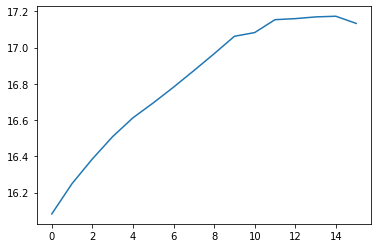

In [196]:
plt.plot(X_16[8*14+2])

In [194]:
y[14]

15

# XGBoostRegressor

In [329]:
ave_score_XGB_MSE_final = []
ave_score_XGB_MAE_final = []


for i in range(10):

  X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

  scaler=StandardScaler()
  X_train_16=scaler.fit_transform(X_train_16)
  X_test_16=scaler.transform(X_test_16)

  XGB = XGBRegressor(n_jobs=-1,colsample_bytree=0.6,objective ='reg:squarederror')

  param_grid = {
          "n_estimators": [250,300,350],
          "learning_rate": [0.01, 0.03, 0.10],
          "gamma": [0.1,0.3],
          "max_depth": [6,8]
          }
  XGB_grid = RandomizedSearchCV(XGB, param_grid, cv=5)
  XGB_grid.fit(X_train_16,y_train_16)
  best_est_XGB = XGB_grid.best_estimator_ 

  best_est_XGB.fit(X_train_16,y_train_16)

  y_pred = best_est_XGB.predict(X_test_16)
  print('Round {}'.format(i+1))
  print('Best parameters:', XGB_grid.best_params_)
  print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
  print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

  print('----------------------------------------------------------------------------------------------------------------------')

  ave_score_XGB_MSE_final.append(mean_squared_error(y_test_16, y_pred))
  ave_score_XGB_MAE_final.append(mean_absolute_error(y_test_16, y_pred))

Round 1
Best parameters: {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.1}
MSE: 3.2562
MAE: 0.9047
----------------------------------------------------------------------------------------------------------------------
Round 2
Best parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0.3}
MSE: 4.0432
MAE: 0.7859
----------------------------------------------------------------------------------------------------------------------
Round 3
Best parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0.1}
MSE: 3.5753
MAE: 0.7411
----------------------------------------------------------------------------------------------------------------------
Round 4
Best parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3}
MSE: 4.6930
MAE: 0.8100
----------------------------------------------------------------------------------------------------------------------
Round 5
Best parameters: {'n_

In [330]:
print("average MSE: {}".format(np.mean(ave_score_XGB_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_XGB_MAE_final)))

average MSE: 3.829578368776089
average MAE: 0.7694927297733323


## (num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

In [287]:
MSE_XGB = []
MAE_XGB = []


for i in range(10):

    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.03,gamma=0.2,max_depth=8,colsample_bytree=0.6,objective ='reg:squarederror')

    XGB.fit(X_train_16,y_train_16)

    y_pred = XGB.predict(X_test_16)
    print('Round {}'.format(i+1))
    print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
    print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

    print('----------------------------------------------------------------------------------------------------------------------')

    MSE_XGB.append(mean_squared_error(y_test_16, y_pred))
    MAE_XGB.append(mean_absolute_error(y_test_16, y_pred))

MSE:  3.722438766705641
MAE:  0.7163124487401377


## Formal test

In [313]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

scaler=StandardScaler()
X_train_16=scaler.fit_transform(X_train_16)
X_test_16=scaler.transform(X_test_16)
 
XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.1,max_depth=8,gamma=0.2,colsample_bytree=0.6,objective='reg:squarederror')

XGB.fit(X_train_16,y_train_16)
    

XGBRegressor(colsample_bytree=0.6, gamma=0.2, max_depth=8, n_estimators=350,
             n_jobs=-1, objective='reg:squarederror')

In [314]:
print(X_train_16.shape)
print(y_train_16.shape)
print(X_test_16.shape)
print(y_test_16.shape)

(5344, 96)
(5344,)
(1336, 96)
(1336,)


In [322]:
# predict
y_pred_XGB = XGB.predict(X_test_16)
np.savetxt('y_pred_XGB', y_pred_XGB, delimiter=',')

In [323]:
print("MSE: ",mean_squared_error(y_test_16, y_pred_XGB))
print("MAE: ", mean_absolute_error(y_test_16, y_pred_XGB))

MSE:  3.8221086993713485
MAE:  0.6929277466487385


In [324]:
# round
y_1_XGB = np.around(y_pred_XGB)
y_1_XGB = y_1_XGB.astype(int)
np.savetxt('y_1_XGB', y_1_XGB, delimiter=',')

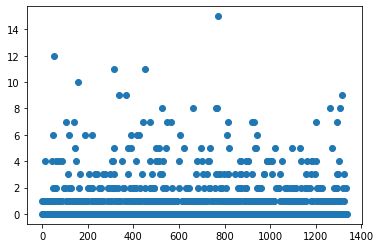

In [325]:
# difference between prediction and label
diff_XGB = abs(y_1_XGB-y_test_16)
np.savetxt('diff_XGB', diff_XGB, delimiter=',')
plt.plot(diff, 'o')

In [326]:
# direct accuracy
(len(diff_XGB) - np.count_nonzero(diff_XGB))/len(diff_XGB)

0.7859281437125748

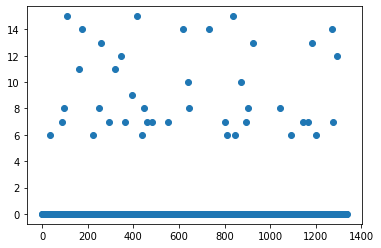

In [327]:
# <=5 then 0
round_diff_XGB = np.zeros(len(y_test_16))
for i in range(len(y_test_16)):
    if abs(y_1_XGB[i]-y_test_16[i])<=5:
        round_diff_XGB[i] = 0
    else:
        round_diff_XGB[i] = abs(y_1_XGB[i]-y_test_16[i])
# plt.subplot(122)
plt.plot(round_diff_XGB, 'o')

In [328]:
# +- 5 pixels are regarded as correctly-classified
1-np.count_nonzero(round_diff_XGB)/len(y_test_16)

0.969311377245509

# LightGBMRegressor

In [14]:
ave_score_LGB_MSE_final = []
ave_score_LGB_MAE_final = []


for i in range(10):

  X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

  scaler=StandardScaler()
  X_train_16=scaler.fit_transform(X_train_16)
  X_test_16=scaler.transform(X_test_16)

  LGB = LGBMRegressor(n_jobs=-1,colsample_bytree=0.6)

  param_grid = {
          "n_estimators": [250,300,350],
          "learning_rate": [0.01, 0.03, 0.10],
          "num_leaves": [16,24,32,40,48],
          "max_depth": [8,16,20,24,32],
          "min_child_samples": [8,16,20,24,32]
          }
  LGB_grid = RandomizedSearchCV(LGB, param_grid, cv=5)
  LGB_grid.fit(X_train_16,y_train_16)
  best_est_LGB = LGB_grid.best_estimator_ 

  best_est_LGB.fit(X_train_16,y_train_16)

  y_pred = best_est_LGB.predict(X_test_16)
  print('Round {}'.format(i+1))
  print('Best parameters:', LGB_grid.best_params_)
  print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
  print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

  print('----------------------------------------------------------------------------------------------------------------------')

  ave_score_LGB_MSE_final.append(mean_squared_error(y_test_16, y_pred))
  ave_score_LGB_MAE_final.append(mean_absolute_error(y_test_16, y_pred))

Round 1
Best parameters: {'num_leaves': 32, 'n_estimators': 350, 'min_child_samples': 8, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 4.1805
MAE: 0.7490
----------------------------------------------------------------------------------------------------------------------
Round 2
Best parameters: {'num_leaves': 48, 'n_estimators': 350, 'min_child_samples': 32, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 3.9863
MAE: 0.7708
----------------------------------------------------------------------------------------------------------------------
Round 3
Best parameters: {'num_leaves': 48, 'n_estimators': 300, 'min_child_samples': 8, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 4.2792
MAE: 0.7192
----------------------------------------------------------------------------------------------------------------------
Round 4
Best parameters: {'num_leaves': 32, 'n_estimators': 350, 'min_child_samples': 8, 'max_depth': 8, 'learning_rate': 0.03}
MSE: 4.1312
MAE: 0.9675
----------------------------------

In [16]:
print("average MSE: {}".format(np.mean(ave_score_LGB_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_LGB_MAE_final)))

average MSE: 4.007201722622896
average MAE: 0.8334229056294271


## (num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

In [287]:
MSE = []
MAE = []
for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)
    
    y_pred = LGB.predict(X_test_16)
    
    MSE.append(mean_squared_error(y_test_16, y_pred))
    MAE.append(mean_absolute_error(y_test_16, y_pred))

print("MSE: ", np.mean(MSE))
print("MAE: ", np.mean(MAE))

MSE:  3.722438766705641
MAE:  0.7163124487401377


In [355]:
import math
print("RMSE: ", math.sqrt(np.mean(MSE)))

RMSE:  1.9293622694314412


## Formal test

In [342]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

scaler=StandardScaler()
X_train_16=scaler.fit_transform(X_train_16)
X_test_16=scaler.transform(X_test_16)
 
LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

LGB.fit(X_train_16,y_train_16)
    

LGBMRegressor(colsample_bytree=0.6, max_depth=20, min_child_samples=8,
              n_estimators=350, num_leaves=32)

In [343]:
print(X_train_16.shape)
print(y_train_16.shape)
print(X_test_16.shape)
print(y_test_16.shape)

(5344, 96)
(5344,)
(1336, 96)
(1336,)


In [344]:
# predict
y_pred_LGB = LGB.predict(X_test_16)
np.savetxt('y_pred_LGB', y_pred_LGB, delimiter=',')

In [345]:
print("MSE: ",mean_squared_error(y_test_16, y_pred_LGB))
print("MAE: ", mean_absolute_error(y_test_16, y_pred_LGB))

MSE:  3.9154039064878
MAE:  0.7266924856384579


In [346]:
# round
y_1_LGB = np.around(y_pred_LGB)
y_1_LGB = y_1_LGB.astype(int)
np.savetxt('y_1_LGB', y_1_LGB, delimiter=',')

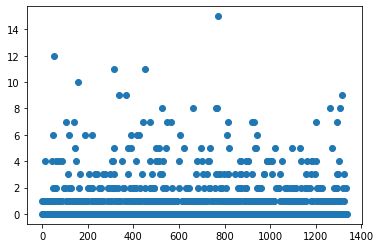

In [347]:
# difference between prediction and label
diff_LGB = abs(y_1_LGB-y_test_16)
np.savetxt('diff_LGB', diff_LGB, delimiter=',')
plt.plot(diff, 'o')

In [348]:
# direct accuracy
(len(diff_LGB) - np.count_nonzero(diff_LGB))/len(diff_LGB)

0.7604790419161677

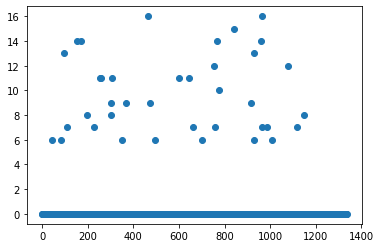

In [358]:
# <=5 then 0
round_diff_LGB = np.zeros(len(y_test_16))
for i in range(len(y_test_16)):
    if abs(y_1_LGB[i]-y_test_16[i])<=5:
        round_diff_LGB[i] = 0
    else:
        round_diff_LGB[i] = abs(y_1_LGB[i]-y_test_16[i])
# plt.subplot(122)
plt.plot(round_diff_LGB, 'o')

In [359]:
# +- 5 pixels are regarded as correctly-classified
1-np.count_nonzero(round_diff_LGB)/len(y_test_16)

0.9715568862275449

## predict those samples with inner wave

In [332]:
X_IW = []
y_IW = []
MSE_IW = []
MAE_IW = []

for i in range(len(y)):
    if y[i]!=0:
        X_IW.append(X_6v[i])
        y_IW.append(y[i])
print(len(X_IW), len(y_IW))

for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_IW, y_IW, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)
    
    y_pred_IW = LGB.predict(X_test_16)
    MSE_IW.append(mean_squared_error(y_test_16, y_pred_IW))
    MAE_IW.append(mean_absolute_error(y_test_16, y_pred_IW))

print("MSE: ", np.mean(MSE_IW))
print("MAE: ", np.mean(MAE_IW))
    

1476 1476
MSE:  0.9737147595785007
MAE:  0.4529205128821133


In [357]:
math.sqrt(np.mean(MSE_IW))

0.9867698615069781

# NNRegressor - TODO

## Conv - 2D

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,activations
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D,Activation,Input,Add,Dense,ZeroPadding2D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.models import Model
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

In [ ]:
# ====================TODO=====================

data_2D = np.load("/content/drive/My Drive/Colab Notebooks/patch/data_2D.npz")

X_2D = data_2D["arr_0"]
y_2D = data_2D["arr_1"]

X_2D[np.isnan(X_2D)]=0
y_2D[np.isnan(y_2D)]=0

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42, shuffle=True)

# X_train_3 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_3 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_3.shape)
print(X_test_3.shape)


In [ ]:
# ====================TODO=====================

model_3=Sequential()
model_3.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=X_train_3[0].shape,kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(64,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(32,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(16,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
# model.add(Dropout(0.1))
model_3.add(Dense(1,activation='sigmoid'))


model_3.summary()

## ResNet 50

## VGG 16